In [1]:
from magicgap import *

In [2]:
extrema = load_data("data/extremal_magic_data")

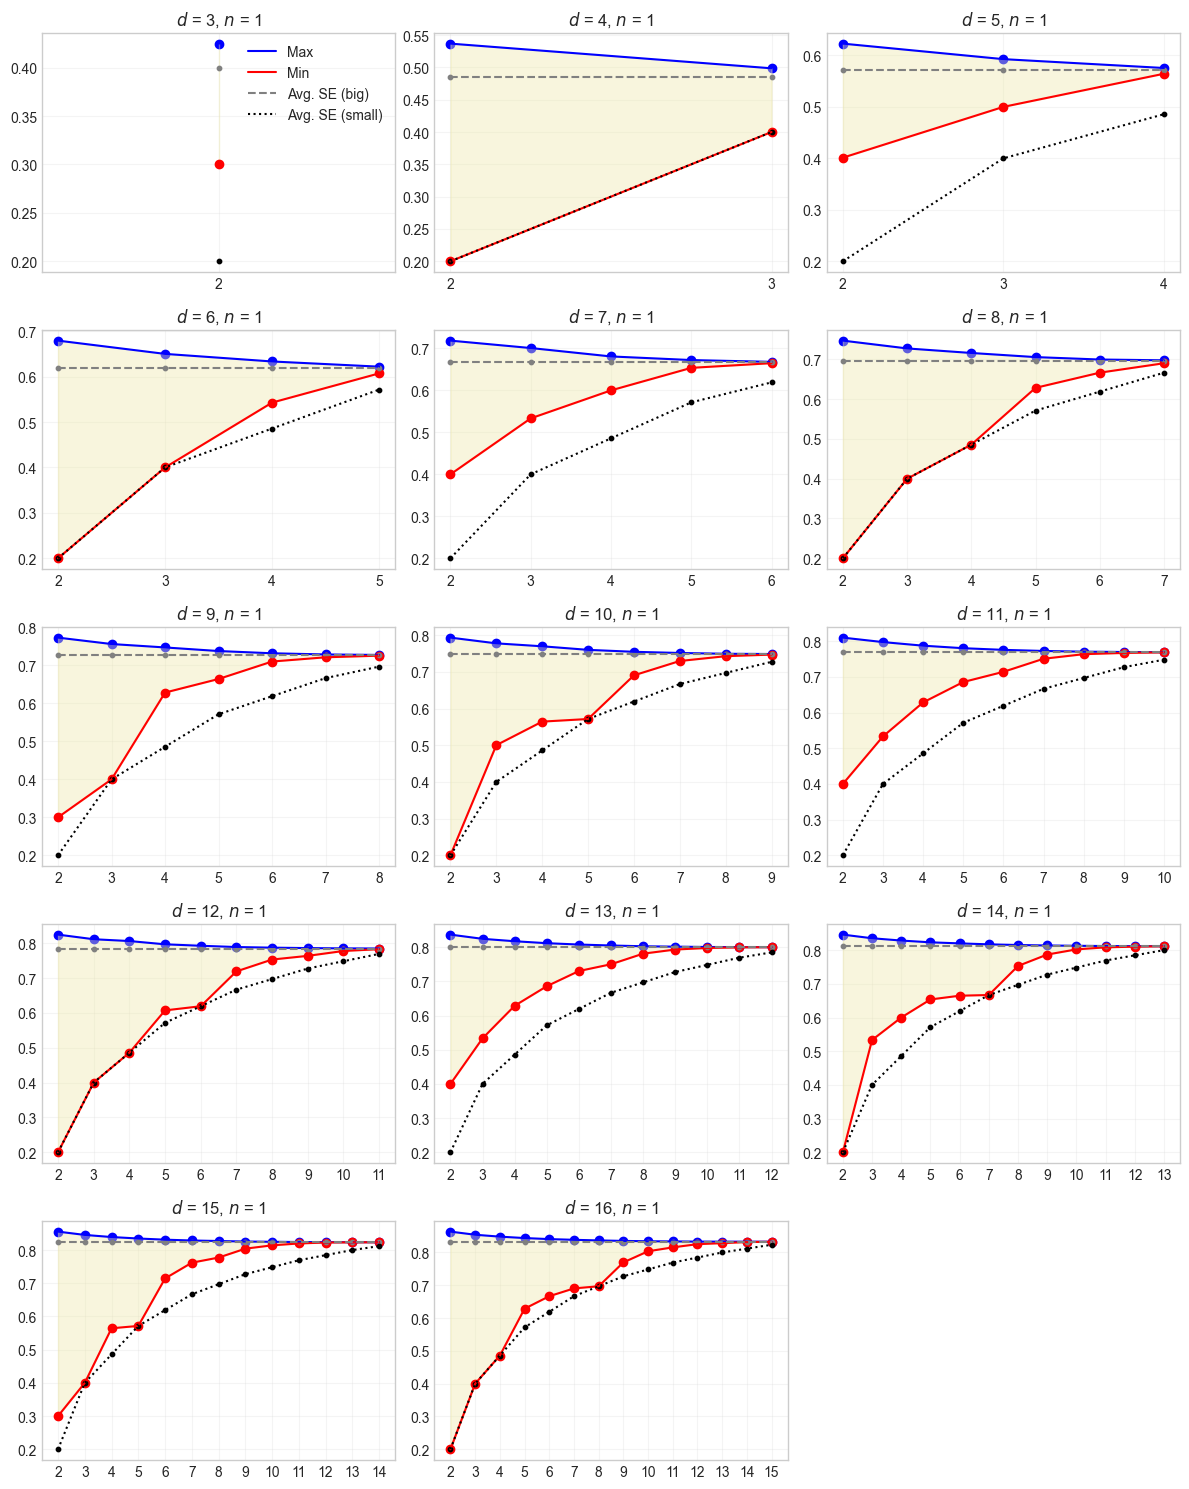

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

n = 1
d_range = sorted(extrema[n].keys())
#d_range = [6,11,15,16]
n_plots = len(d_range)
cols = 3
rows = math.ceil(n_plots/cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten() if type(axes) == np.ndarray else [axes]
for i, d in enumerate(d_range):
    d_b = d**n
    d_s_range = sorted(extrema[n][d].keys())
    mins = [extrema[n][d][d_s]["min"] for d_s in d_s_range]
    maxes = [extrema[n][d][d_s]["max"] for d_s in d_s_range]
    ase_s = [avg_magic_analytic(d_s) for d_s in d_s_range]
    ase_b = avg_magic_analytic(d_b)

    axes[i].plot(d_s_range, maxes, color="blue", label="Max")
    axes[i].scatter(d_s_range, maxes, color="blue")
    axes[i].fill_between(d_s_range, mins, maxes, alpha=0.4, color="palegoldenrod")
    axes[i].plot(d_s_range, mins, color="red", label="Min")
    axes[i].scatter(d_s_range, mins, color="red")

    axes[i].plot(d_s_range, [ase_b]*len(d_s_range), label="Avg. SE (big)", linestyle="--", color="grey")
    axes[i].scatter(d_s_range, [ase_b]*len(d_s_range), color="grey", s=10)

    axes[i].plot(d_s_range, ase_s, label="Avg. SE (small)", linestyle=":", color="black")
    axes[i].scatter(d_s_range, ase_s, color="black", s=10)
    
    axes[i].set_title("$d$ = %d, $n$ = %d" % (d, n))
    axes[i].set_xticks(d_s_range)
    axes[i].grid(True, alpha=0.2)
    if i == 0:
        axes[i].legend()

for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("../img/extrema_qudits.pdf", dpi=600, bbox_inches='tight') 

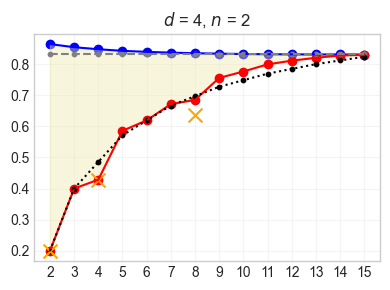

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')

d = 4
nqubits = False
n_range = []
for n in extrema.keys():
    if n != 1:
        if d in extrema[n]:
            n_range.append(n)
n_range = [sorted(n_range)]
n_range = [2]
#n_range = [3,4]
n_plots = len(n_range)
cols = n_plots
rows = 1
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten() if type(axes) == np.ndarray else [axes]
for i, n in enumerate(n_range):
    d_b = d**n
    d_s_range = sorted(extrema[n][d].keys())
    mins = [extrema[n][d][d_s]["min"] for d_s in d_s_range]
    maxes = [extrema[n][d][d_s]["max"] for d_s in d_s_range]
    ase_s = [avg_magic_analytic(d_s) for d_s in d_s_range]
    ase_b = avg_magic_analytic(d_b, nqubits=nqubits)

    axes[i].plot(d_s_range, maxes, color="blue", label="Max")
    axes[i].scatter(d_s_range, maxes, color="blue")
    axes[i].fill_between(d_s_range, mins, maxes, alpha=0.4, color="palegoldenrod")
    axes[i].plot(d_s_range, mins, color="red", label="Min")
    axes[i].scatter(d_s_range, mins, color="red")

    axes[i].plot(d_s_range, [ase_b]*len(d_s_range), label="Avg. SE (big)", linestyle="--", color="grey")
    axes[i].scatter(d_s_range, [ase_b]*len(d_s_range), color="grey", s=10)

    axes[i].plot(d_s_range, ase_s, label="Avg. SE (small)", linestyle=":", color="black")
    axes[i].scatter(d_s_range, ase_s, color="black", s=10)

    nqubit_dims = []
    nqubit_ase = []
    for d_s in d_s_range:
        nq = int(np.log2(d_s))
        if np.isclose(2**nq, d_s):
            nqubit_dims.append(d_s)
            nqubit_ase.append(avg_magic_analytic(d_s, nqubits=True))
    axes[i].scatter(nqubit_dims, nqubit_ase, color="orange", marker="x", s=100, label="Avg. SE (n-qubits)")

    axes[i].set_title("$d$ = %d, $n$ = %d" % (d, n))
    axes[i].set_xticks(d_s_range)
    axes[i].grid(True, alpha=0.2)
    #if i == len(n_range)-1:
    #    axes[i].legend()
    
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("../img/extrema_nququarts.pdf", dpi=600, bbox_inches='tight') 

In [3]:
n = 2
d = 4
D = wh_operators(*[d]*n)
data = np.load("data/"+extrema[n][d][10]["min_file"])

In [4]:
B = data["Bmin"]
Pi = B.T @ B.conj()

In [6]:
construct_chi(D, Pi)*(d**n)

array([[[[10.   +0.j   , -0.003-0.j   , -2.   -0.j   , -0.003+0.j   ],
         [-0.   +0.003j,  0.004-0.j   , -0.   +0.009j,  0.005+0.j   ],
         [ 2.   -0.j   ,  0.003+0.j   , -2.   -0.j   , -0.003+0.j   ],
         [-0.   -0.003j,  0.005-0.j   ,  0.   +0.009j,  0.004+0.j   ]],

        [[ 0.   -0.002j,  0.001-0.j   ,  0.   -0.005j,  0.014+0.j   ],
         [-0.   +0.005j,  0.001+0.j   ,  0.   +0.012j,  0.009+0.j   ],
         [ 0.   +0.001j, -0.007-0.j   , -0.   -0.006j,  0.005+0.j   ],
         [ 0.   -0.003j, -0.011-0.j   ,  0.   -0.002j, -0.006-0.j   ]],

        [[ 2.   -0.j   , -0.012+0.j   , -2.   -0.j   , -0.012-0.j   ],
         [ 0.   +0.004j, -0.01 -0.j   , -0.   -0.004j,  0.009+0.j   ],
         [ 2.   +0.j   , -0.014-0.j   , -2.   -0.j   ,  0.014-0.j   ],
         [ 0.   -0.004j,  0.009-0.j   ,  0.   -0.004j, -0.01 +0.j   ]],

        [[ 0.   +0.002j,  0.014-0.j   ,  0.   +0.005j,  0.001+0.j   ],
         [ 0.   +0.003j, -0.006+0.j   , -0.   -0.002j, -0.011+0.j   ],


In [ ]:

np.array([(D[a].conj().T @ Pi).trace() for a in np.ndindex(*[4]*(2*n))])


array([10.   +0.j   , -0.003-0.j   , -2.   -0.j   , -0.003+0.j   ,
       -0.   +0.003j,  0.004-0.j   , -0.   +0.009j,  0.005+0.j   ,
        2.   -0.j   ,  0.003+0.j   , -2.   -0.j   , -0.003+0.j   ,
       -0.   -0.003j,  0.005-0.j   ,  0.   +0.009j,  0.004+0.j   ,
        0.   -0.002j,  0.001-0.j   ,  0.   -0.005j,  0.014+0.j   ,
       -0.   +0.005j,  0.001+0.j   ,  0.   +0.012j,  0.009+0.j   ,
        0.   +0.001j, -0.007-0.j   , -0.   -0.006j,  0.005+0.j   ,
        0.   -0.003j, -0.011-0.j   ,  0.   -0.002j, -0.006-0.j   ,
        2.   -0.j   , -0.012+0.j   , -2.   -0.j   , -0.012-0.j   ,
        0.   +0.004j, -0.01 -0.j   , -0.   -0.004j,  0.009+0.j   ,
        2.   +0.j   , -0.014-0.j   , -2.   -0.j   ,  0.014-0.j   ,
        0.   -0.004j,  0.009-0.j   ,  0.   -0.004j, -0.01 +0.j   ,
        0.   +0.002j,  0.014-0.j   ,  0.   +0.005j,  0.001+0.j   ,
        0.   +0.003j, -0.006+0.j   , -0.   -0.002j, -0.011+0.j   ,
        0.   -0.001j, -0.005+0.j   , -0.   +0.006j,  0.007-0.j